Loading C:\Users\ahmed\Documents\GitHub\mne-python\test.snirf


KeyboardInterrupt: 

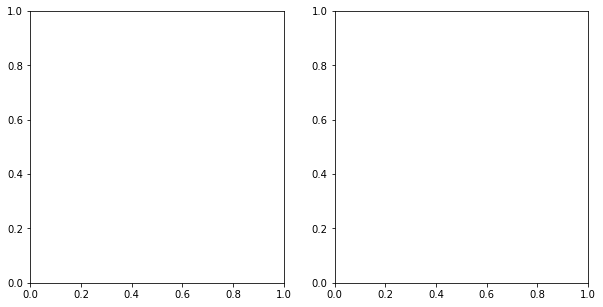

In [2]:
#Sara's code-block
# %% Imports
import numpy as np
import matplotlib.pyplot as plt
from mne.io.snirf import read_raw_snirf

# %% Reading the file
#path_to_snirf = "2021_08-Finger_Tapping-Hb.snirf"
#path_to_snirf = "1745f1d-Moments.snirf"
path_to_snirf = "test.snirf" #Patient 1 Run 1 data
snirf = read_raw_snirf(path_to_snirf)

# %% Obtaining general information 
# you can query snirf.info for measurement data/time
# information about the channels (their names and locations) can also be accessed in snirf.info as follows:
channel_names = [x['ch_name'] for x in snirf.info['chs']]
is_hbo = np.array([1 if channel_name.endswith(
   'HbO') else 0 for channel_name in channel_names], dtype=bool)
channel_locations_3d = [x['loc'][:3] for x in snirf.info['chs']] 

# %% Obtaining NIRS data
a = snirf.get_data()

# %% Plotting 
_, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].pcolor(snirf.times, np.arange(np.sum(is_hbo)),
            a[is_hbo, :], shading='nearest')
ax[0].set_title('HbO')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Channel number')
ax[1].pcolor(snirf.times, np.arange(np.sum(~is_hbo)),
            a[~is_hbo, :], shading='nearest')
ax[1].set_title('HbR')
ax[1].set_xlabel('Time [s]')
plt.show() 

Loading C:\Users\ahmed\Documents\GitHub\mne-python\f096049-Hb_Moments.snirf


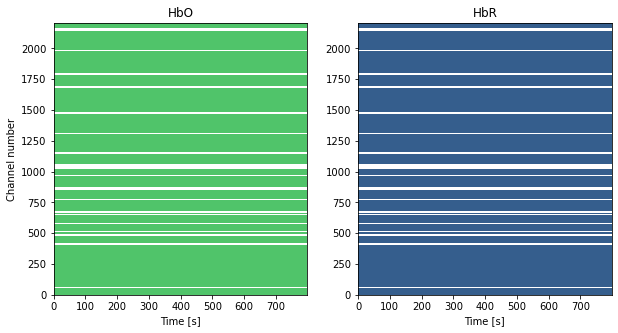

In [1]:
# %% Imports
import numpy as np
import matplotlib.pyplot as plt
from mne.io.snirf import read_raw_snirf

# %% Reading the file
path_to_snirf = "f096049-Hb_Moments.snirf"
snirf = read_raw_snirf(path_to_snirf)

# %% Obtaining general information
# you can query snirf.info for measurement data/time
# information about the channels (their names and locations) can also be accessed in snirf.info as follows:
channel_names = [x['ch_name'] for x in snirf.info['chs']]
is_hbo = np.array([1 if channel_name.endswith(
   'HbO') else 0 for channel_name in channel_names], dtype=bool)
channel_locations_3d = [x['loc'][:3] for x in snirf.info['chs']]

# %% Obtaining NIRS data
data = snirf.get_data()



# %% Plotting
_, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].pcolormesh(snirf.times, np.arange(np.sum(is_hbo)), data[is_hbo, :], shading='nearest')
ax[0].set_title('HbO')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Channel number')
ax[1].pcolormesh(snirf.times, np.arange(np.sum(~is_hbo)), data[~is_hbo, :], shading='nearest')
ax[1].set_title('HbR')
ax[1].set_xlabel('Time [s]')
plt.show()

In [2]:
print(is_hbo)
#We'll use channels 0 and 2 for now
print(channel_names[8])
print(channel_names[4080])
hbo_1=data[8,:] #Right
hbo_2=data[4080,:] #Left
#hbr_sample=data[2,:]

[ True  True False ...  True False False]
S01_D01d3 HbO
S47_D49d5 HbO


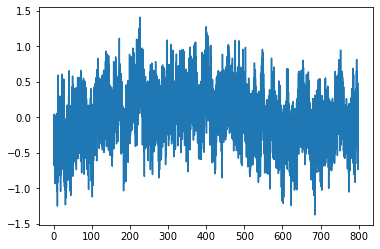

In [3]:
time=snirf.times
plt.plot(time, hbo_1)
#plt.plot(time, data[2,:])
plt.show()
#Raw data- very messy

In [4]:
#Low Pass Filter
from scipy.signal import butter, lfilter, freqz


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [8]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    return np.convolve(np.squeeze(values), weights, 'valid')

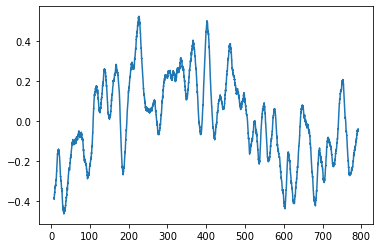

In [9]:
moving_averages= movingaverage(hbo_1,100)
time_avg= movingaverage(time,100)
plt.plot(time_avg, moving_averages)
hbo_1_avg=moving_averages
plt.show()

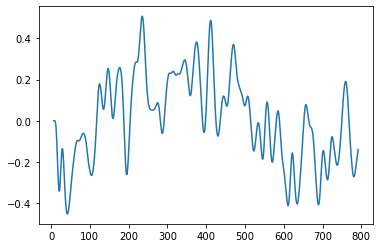

In [10]:
hbo_1_filtered= butter_lowpass_filter(hbo_1_avg, cutoff=0.1, fs=10, order=6)
plt.plot(time_avg, hbo_1_filtered)
plt.show()

In [28]:
events=np.zeros([avg.size,2]) #5554 #This is a 0,1 array representing the y_train

for i in range(len(avg)): #0 to 5554   
    #Right Ranges
    if avg[i,] >=20.1084403991699 and avg[i,] <= 37.2906377315521:
        events[i,0]=1
    elif avg[i] >=96.0085089206695 and avg[i,] <= 115.45904135704:
        events[i,0]=1
    elif avg[i,] >=215.648464679718 and avg[i,] <=233.39488863945:
        events[i,0]=1
    elif avg[i,] >=254.080522060394 and avg[i,] <=270.762350082397:
        events[i,0]=1
    elif avg[i,] >=329.180588245391 and avg[i,] <=347.297376155853:
        events[i,0]=1
    elif avg[i,] >=407.016450643539 and avg[i,] <=423.932327508926:
        events[i,0]=1
    elif avg[i,] >=521.084533214569 and avg[i,] <=538.435498714447:
        events[i,0]=1
    elif avg[i,] >=597.4884724617 and avg[i,] <=615.069853544235:
        events[i,0]=1
    elif avg[i,] >=673.024507522583 and avg[i,] <=691.171491146087:
        events[i,0]=1
    elif avg[i,] >=750.456876039505 and avg[i,] <=768.739782094955:
        events[i,0]=1

    #Left Ranges
    elif avg[i,] >=57.9085166454315 and avg[i,] <= 75.3247609138488:
        events[i,1]=1
    elif avg[i,] >=136.044531583786 and avg[i,] <= 155.393176078796:
        events[i,1]=1
    elif avg[i,] >=176.312454462051 and avg[i,] <= 194.860765457153:
        events[i,1]=1
    elif avg[i,] >=291.416473150253 and avg[i,] <=308.596531152725:
        events[i,1]=1
    elif avg[i,] >=368.048515081405 and avg[i,] <=386.398197889328:
        events[i,1]=1
    elif avg[i,] >=444.316514968872 and avg[i,] <=462.033178329467:
        events[i,1]=1
    elif avg[i,] >=482.384647130966 and avg[i,] <=500.434092283248:
        events[i,1]=1
    elif avg[i,] >=558.784443378448 and avg[i,] <=576.868988275528:
        events[i,1]=1
    elif avg[i,] >=635.356453895568 and avg[i,] <=651.970604419708:
        events[i,1]=1
    elif avg[i,] >=711.756521224975 and avg[i,] <=729.5390236377:
        events[i,1]=1

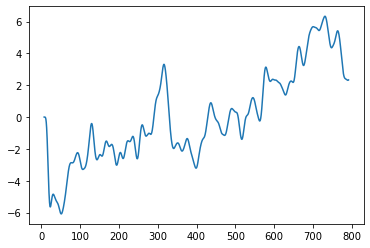

In [11]:
hbo_2_avg= movingaverage(hbo_2,100)
hbo_2_filtered= butter_lowpass_filter(hbo_2_avg, cutoff=0.1, fs=10, order=6)
plt.plot(time_avg, hbo_2_filtered)
plt.show()

In [29]:
from sklearn.cross_decomposition import PLSRegression
#PLSR-Discriminant
plsr=PLSRegression(2)
x= np.zeros([len(hbo_1_filtered),2])
x[:,0]=hbo_1_filtered
x[:,1]=hbo_2_filtered
plsr.fit(x, events)

PLSRegression()

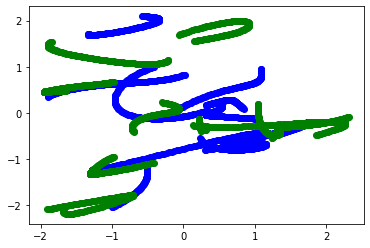

In [63]:
x_scores=plsr.x_scores_
y_scores=plsr.y_scores_
scores_right=x_scores[events[:,0]==1,:]
scores_left=x_scores[events[:,1]==1,:]
#scores_nan=np.empty([1,1])
#for i in range(x_scores[:,0].size):
#    if events[i,0]==0 and events[i,1]==0:
#        if i==0:
#            score_nan=x_scores[i,:]
#        else:
#            np.append(scores_nan,x_scores[i,:].reshape(-1,1), axis=1)
#            print(scores_nan)
#scores_nan=x_scores[np.all([events[:,0]==0,events[:,1]==0]),:]
plt.scatter(scores_left[:,0],scores_left[:,1], color='b')
plt.scatter(scores_right[:,0],scores_right[:,1], color='g')
#plt.scatter(scores_nan[:,0],scores_nan[:,1], color='k')
#plt.scatter(y_scores[:,0],y_scores[:,1], color='r')
plt.show()

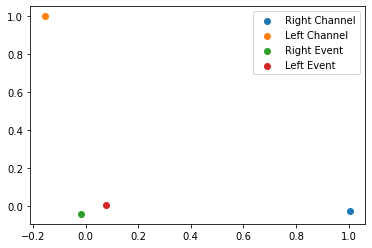

In [45]:
x_loadings=plsr.x_loadings_
y_loadings=plsr.y_loadings_
plt.scatter(x_loadings[0,0],x_loadings[0,1])
plt.scatter(x_loadings[1,0],x_loadings[1,1])
plt.scatter(y_loadings[0,0],y_loadings[0,1])
plt.scatter(y_loadings[1,0],y_loadings[1,1])
plt.legend(['Right Channel','Left Channel','Right Event', 'Left Event'])
plt.show()

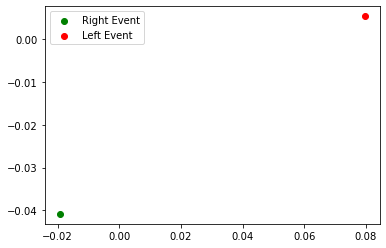

In [47]:
plt.scatter(y_loadings[0,0],y_loadings[0,1], color='g')
plt.scatter(y_loadings[1,0],y_loadings[1,1], color='r')
plt.legend(['Right Event', 'Left Event'])
plt.show()

Conclusions:
- The right channel is has positive spikes during left-tapping events
- The left channel has negative spikes during right-tapping events